# Overview:

"Trips & Travel.Com" aims to establish a viable business model to expand its customer base. To achieve this, the company plans to introduce a new range of travel packages. Currently, there are five types of packages offered: Basic, Standard, Deluxe, Super Deluxe, and King. An analysis of last year's data revealed that only 18% of customers purchased these packages. The marketing costs were high because customers were contacted at random, without utilizing available data effectively.

### Tasks to Solve :   
        -To predict which customer is more likely to purchase the newly introduced travel package   
        -Which variables are most significant. 
        -Which segment of customers should be targeted more.

# PHASE - I
## Data Ingestion:
    -The dataset is collected from Kaggle.
    -In this phase, we will load the dataset into a pandas DataFrame to facilitate further analysis. The dataset will be inspected to ensure it has been successfully loaded.

In [4]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("Travel.csv")
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


## PHASE - II
### Data Understanding:

In this phase, we aim to gain a comprehensive understanding of the dataset. This involves examining the structure, summary statistics, and distributions of the data. Key steps include:

1. **Data Overview**: Reviewing the dataset's columns and data types to understand what kind of information is available.

   - Examine the first few rows of the dataset to understand its structure and contents.
   - Check the data types and missing values to assess data quality and completeness.

2. **Descriptive Statistics**: Calculating summary statistics (e.g., mean, median, standard deviation) to get a sense of the central tendency and variability of the data.

   - Compute summary statistics for numerical variables to understand their distribution and variability.

3. **Data Distributions**: Visualizing the distributions of key features to identify patterns, outliers, and potential data quality issues.

   - Generate histograms, box plots, or density plots to visualize the distribution of important variables.
   - Look for any skewness, multimodality, or outliers in the data distributions.

4. **Correlation Analysis**: Analyzing correlations between features to identify relationships that might be important for modeling.

   - Calculate the correlation matrix between numerical variables to identify strong correlations.
   - Visualize the correlation matrix using a heatmap to identify patterns of association between variables.


In [8]:
print(df.columns)

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')


#### Description of Data:

1. **CustomerID**: Unique identifier for each customer.
2. **ProdTaken**: Indicates whether the customer has taken a product or package (1 for yes, 0 for no).
3. **Age**: Age of the customer.
4. **TypeofContact**: Mode of contact with the customer (e.g., phone, email).
5. **CityTier**: Classification of the city where the customer resides (e.g., Tier 1, Tier 2, Tier 3).
6. **DurationOfPitch**: Duration of the sales pitch given to the customer (in minutes).
7. **Occupation**: Occupation of the customer.
8. **Gender**: Gender of the customer.
9. **NumberOfPersonVisiting**: Number of people visiting with the customer.
10. **NumberOfFollowups**: Number of follow-ups made to the customer.
11. **ProductPitched**: The specific product or package pitched to the customer.
12. **PreferredPropertyStar**: Star rating of the preferred property (e.g., 3-star, 4-star, 5-star).
13. **MaritalStatus**: Marital status of the customer (e.g., single, married).
14. **NumberOfTrips**: Number of trips taken by the customer.
15. **Passport**: Indicates whether the customer has a passport (1 for yes, 0 for no).
16. **PitchSatisfactionScore**: Customer's satisfaction score for the sales pitch (typically on a scale).
17. **OwnCar**: Indicates whether the customer owns a car (1 for yes, 0 for no).
18. **NumberOfChildrenVisiting**: Number of children accompanying the customer during the visit.
19. **Designation**: Job title or designation of the customer.
20. **MonthlyIncome**: Monthly incllness Tourism Package.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [10]:
# Calculate and display descriptive statistics for numerical columns
print(df.describe())

          CustomerID    ProdTaken          Age     CityTier  DurationOfPitch  \
count    4888.000000  4888.000000  4662.000000  4888.000000      4637.000000   
mean   202443.500000     0.188216    37.622265     1.654255        15.490835   
std      1411.188388     0.390925     9.316387     0.916583         8.519643   
min    200000.000000     0.000000    18.000000     1.000000         5.000000   
25%    201221.750000     0.000000    31.000000     1.000000         9.000000   
50%    202443.500000     0.000000    36.000000     1.000000        13.000000   
75%    203665.250000     0.000000    44.000000     3.000000        20.000000   
max    204887.000000     1.000000    61.000000     3.000000       127.000000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count             4888.000000        4843.000000            4862.000000   
mean                 2.905074           3.708445               3.581037   
std                  0.724891           1.002509      

In [11]:
# Calculate and display descriptive statistics for categorical columns
print(df.describe(include=['object']))

       TypeofContact Occupation Gender ProductPitched MaritalStatus  \
count           4863       4888   4888           4888          4888   
unique             2          4      3              5             4   
top     Self Enquiry   Salaried   Male          Basic       Married   
freq            3444       2368   2916           1842          2340   

       Designation  
count         4888  
unique           5  
top      Executive  
freq          1842  


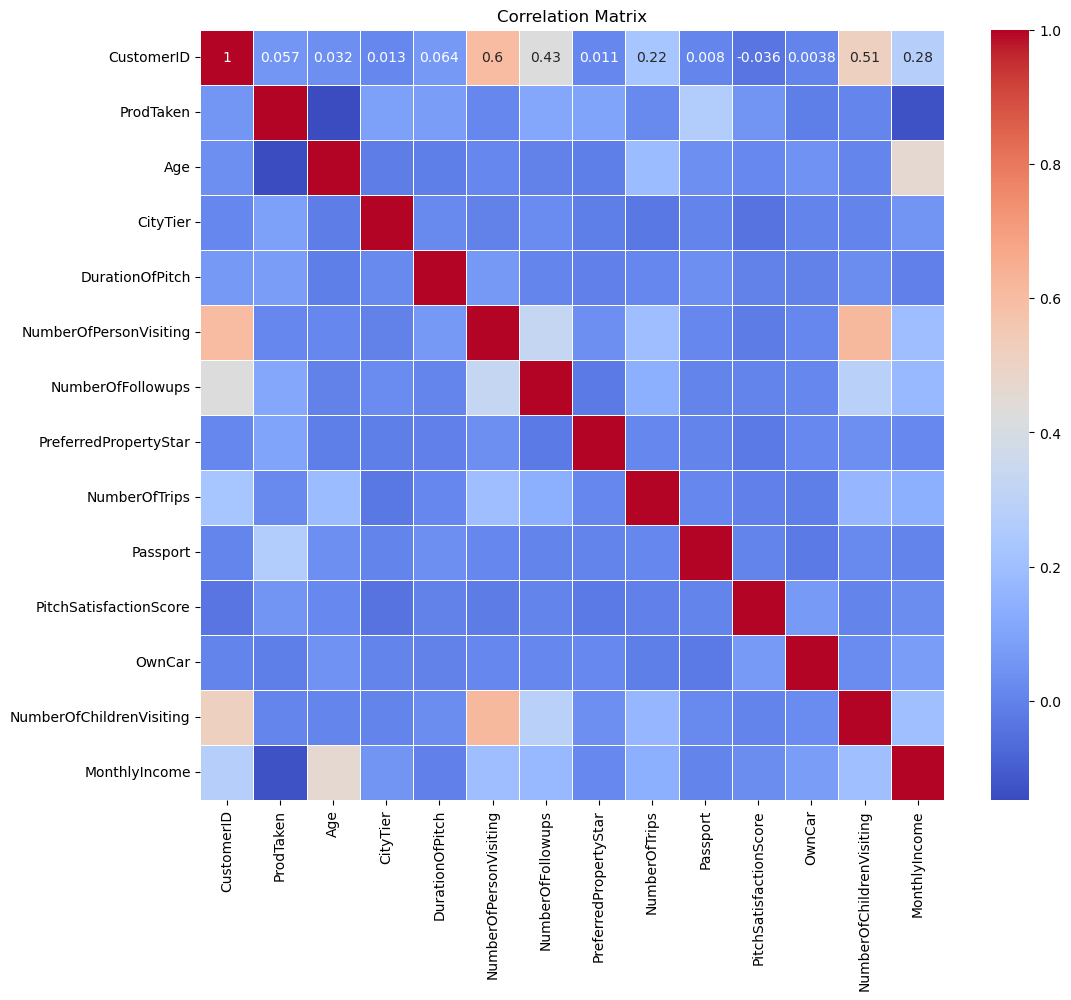

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numerical columns for correlation analysis
numerical_data = df.select_dtypes(include=[np.number])

correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


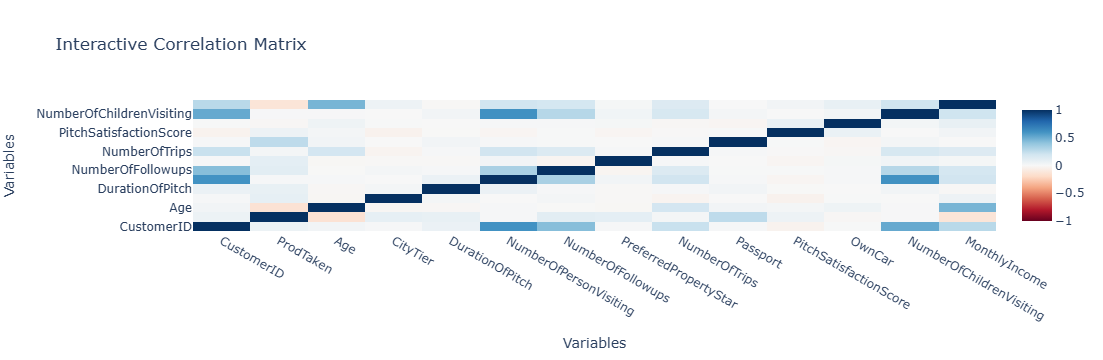

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Select only numerical columns for correlation analysis
numerical_data = df.select_dtypes(include=[np.number])

# Compute the correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

# Create an interactive heatmap with Plotly
fig = make_subplots()

# Add heatmap trace
heatmap_trace = go.Heatmap(z=correlation_matrix.values,
                           x=correlation_matrix.columns,
                           y=correlation_matrix.columns,
                           colorscale='RdBu',
                           zmin=-1, zmax=1)
fig.add_trace(heatmap_trace)

# Update layout
fig.update_layout(title='Interactive Correlation Matrix',
                  xaxis=dict(title='Variables'),
                  yaxis=dict(title='Variables'))

# Show the interactive plot
fig.show()


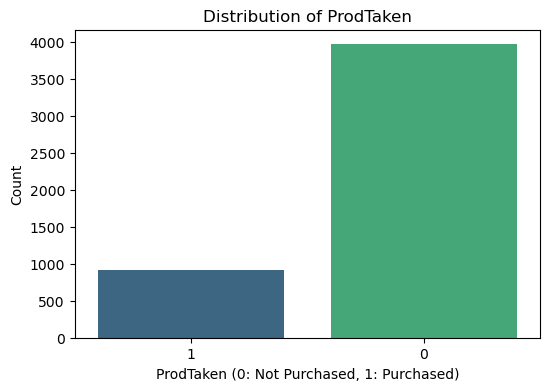

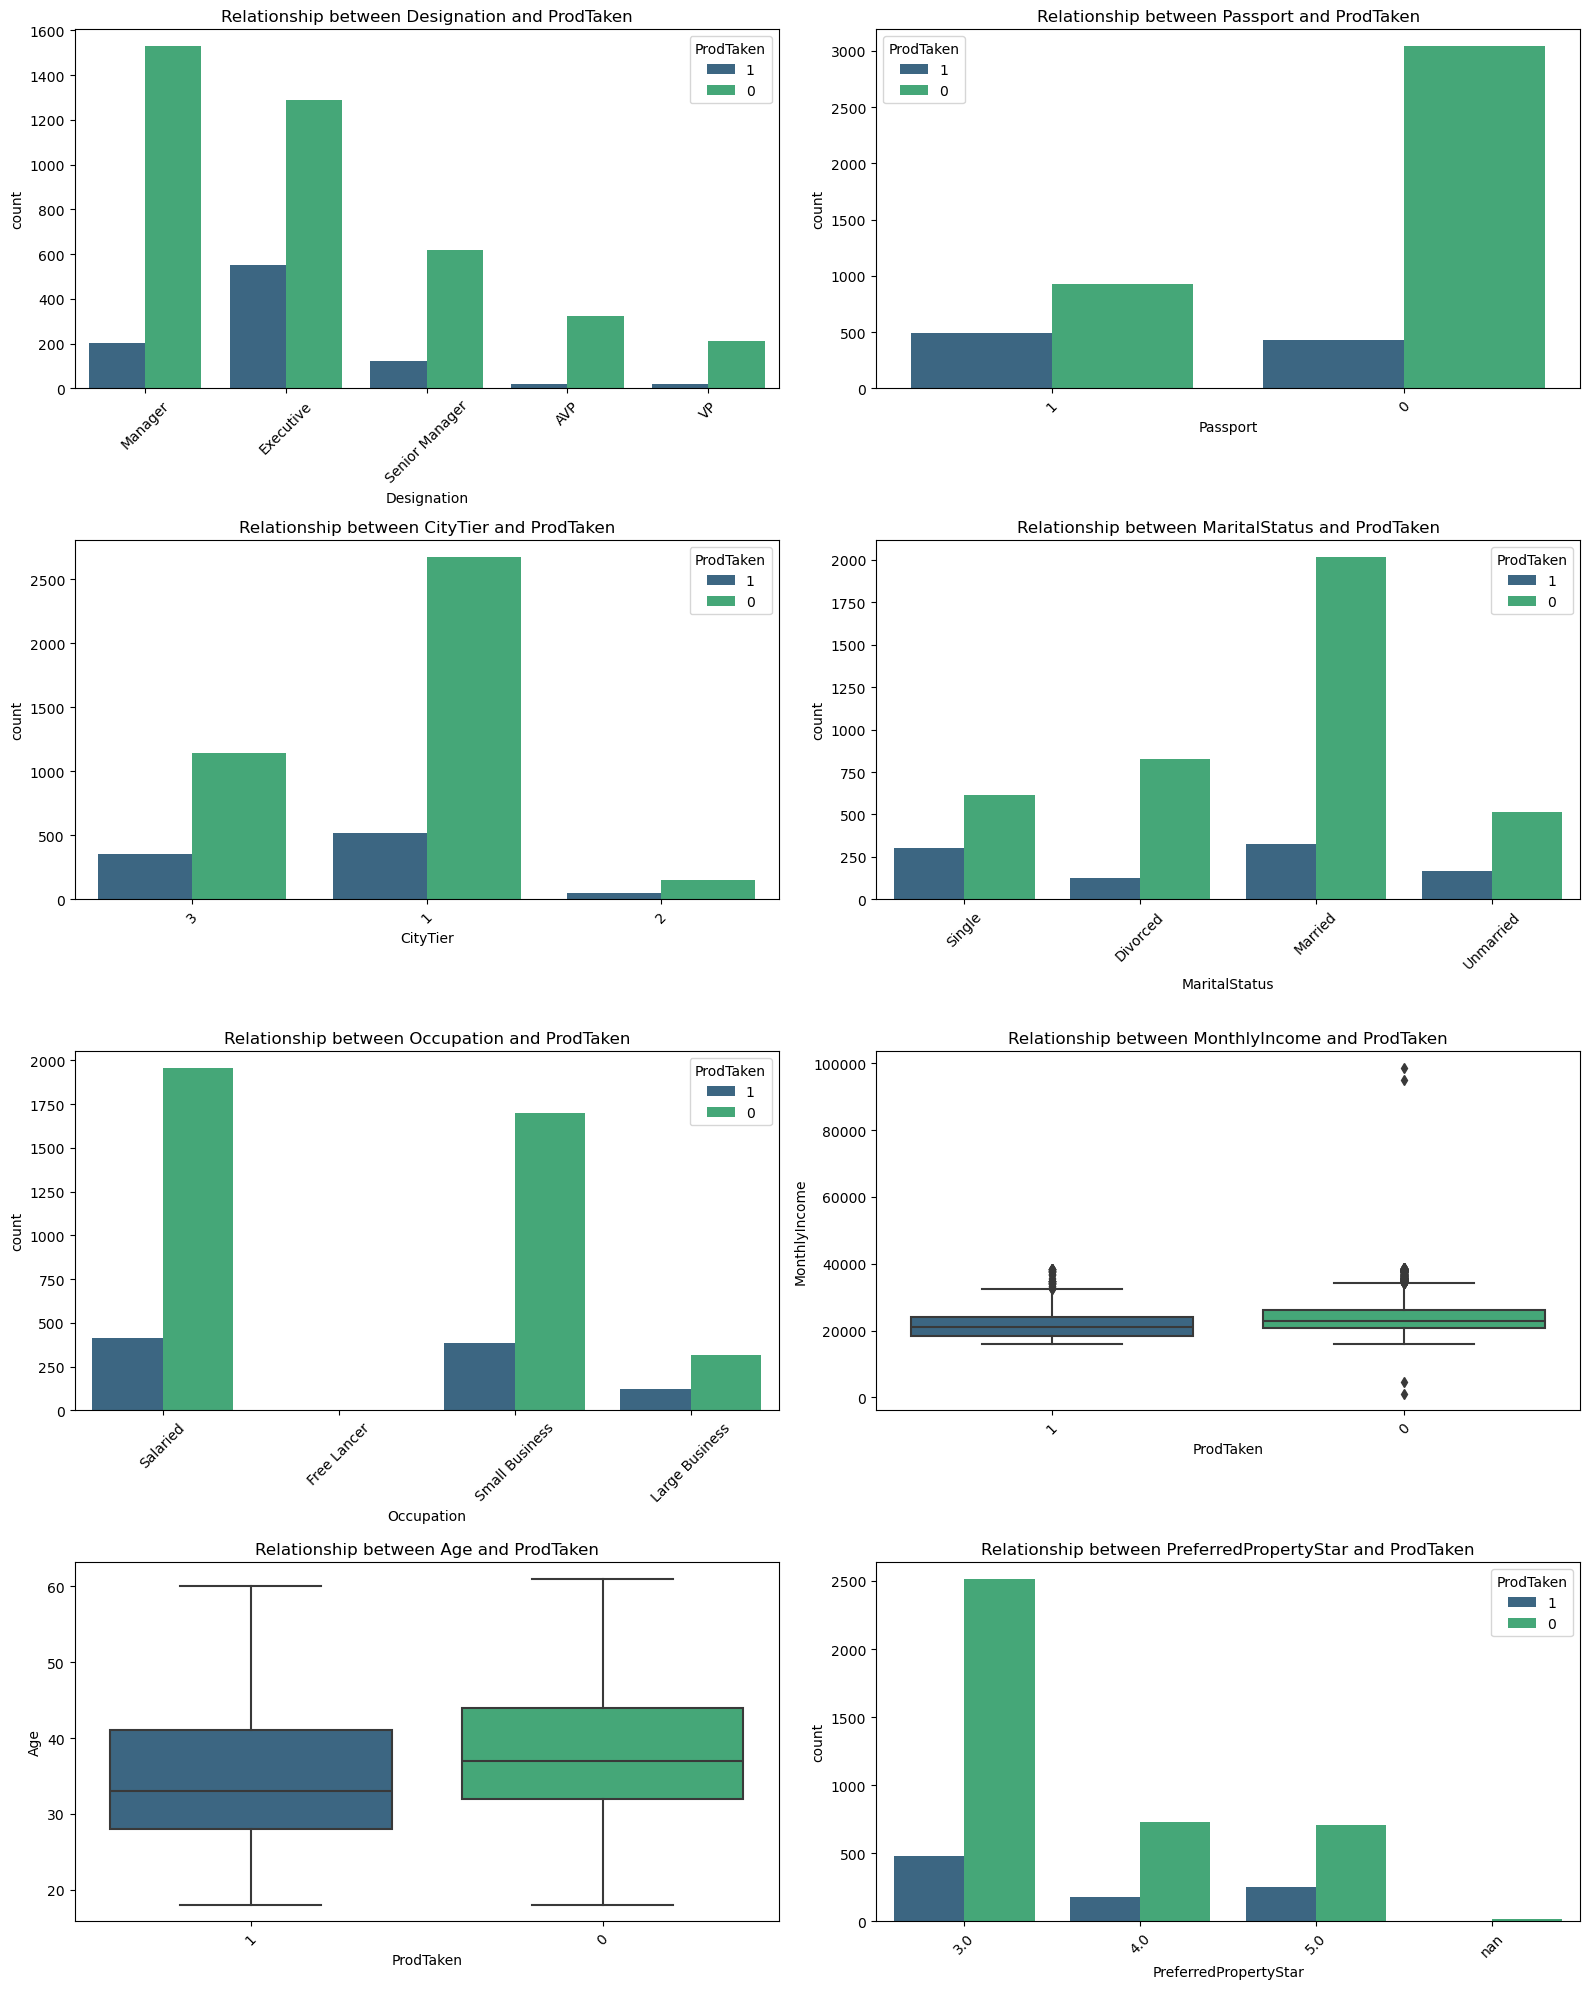

In [19]:

# Ensure categorical data is treated as strings
categorical_features = [
    'TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 
    'MaritalStatus', 'Designation', 'CityTier', 'Passport', 'OwnCar', 'PreferredPropertyStar'
]

for feature in categorical_features:
    df[feature] = df[feature].astype(str)

# Convert ProdTaken to categorical
df['ProdTaken'] = df['ProdTaken'].astype(str)

# Plot distribution of ProdTaken
plt.figure(figsize=(6, 4))
sns.countplot(x='ProdTaken', data=df, palette='viridis')
plt.title('Distribution of ProdTaken')
plt.xlabel('ProdTaken (0: Not Purchased, 1: Purchased)')
plt.ylabel('Count')
plt.show()

# Plot relationships between ProdTaken and other features
features = ['Designation', 'Passport', 'CityTier', 'MaritalStatus', 'Occupation', 'MonthlyIncome', 'Age', 'PreferredPropertyStar']

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for ax, feature in zip(axes, features):
    if df[feature].dtype == 'object':
        sns.countplot(x=feature, hue='ProdTaken', data=df, palette='viridis', ax=ax)
    else:
        sns.boxplot(x='ProdTaken', y=feature, data=df, palette='viridis', ax=ax)
    ax.set_title(f'Relationship between {feature} and ProdTaken')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()